# PyCaret 2 Regression Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

'2.2.1'

# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initialize Setup

In [3]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


# 3. Compare Baseline

In [4]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2671.6062,23032272.0323,4796.0417,0.8391,0.4429,0.3133,0.0280
catboost,CatBoost Regressor,2834.6112,25122500.5678,5010.4374,0.8238,0.4876,0.3500,0.7320
rf,Random Forest Regressor,2773.4915,25322439.6709,5029.5502,0.8218,0.4815,0.3436,0.1040
lightgbm,Light Gradient Boosting Machine,3018.9895,25515012.2780,5049.8492,0.8192,0.5534,0.3876,0.0460
et,Extra Trees Regressor,2779.8348,28221038.4660,5302.5710,0.8039,0.4862,0.3265,0.0900
ada,AdaBoost Regressor,4366.1001,29298215.0099,5411.0606,0.7915,0.6478,0.7662,0.0140
xgboost,Extreme Gradient Boosting,3257.2767,31489404.4000,5610.5080,0.7774,0.5723,0.4072,0.2160
llar,Lasso Least Angle Regression,4326.7379,38523190.3697,6194.6380,0.7345,0.6004,0.4409,0.0060
br,Bayesian Ridge,4344.6330,38551085.7398,6197.1147,0.7343,0.6400,0.4437,0.0060
lar,Least Angle Regression,4332.7631,38549929.8658,6197.0824,0.7343,0.6369,0.4415,0.0080


# 4. Create Model

In [5]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2972.9328,24058897.6188,4904.9870,0.8563,0.6083,0.3985
1,3080.5341,29299757.4511,5412.9250,0.8296,0.4459,0.3268
2,3022.2314,27624562.3462,5255.9074,0.6502,0.6822,0.4361
3,3146.2421,25018957.3381,5001.8954,0.7911,0.6398,0.5095
4,3154.6899,28894513.1127,5375.3617,0.7851,0.5901,0.3617
5,2931.0896,21432485.9043,4629.5233,0.8621,0.4131,0.2829
6,2625.9358,20785815.6794,4559.1464,0.8586,0.3891,0.3070
7,2678.3617,24232738.8679,4922.6760,0.8668,0.5098,0.2720
8,2710.3380,21418666.0615,4628.0305,0.8617,0.5574,0.4101
9,3273.2286,29598376.0758,5440.4390,0.8094,0.5916,0.3804


In [6]:
import numpy as np
lgbms = [create_model('lightgbm', learning_rate=i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4208.4914,37359346.2148,6112.2292,0.7769,0.6969,0.5903
1,4164.7621,38772692.6839,6226.7723,0.7746,0.6826,0.4917
2,4545.7489,45041923.2265,6711.3280,0.4297,0.9558,0.6772
3,4390.3369,41942309.5563,6476.2883,0.6498,0.7140,0.7225
4,4612.6274,41966536.7333,6478.1584,0.6879,0.6953,0.5762
5,4166.0224,34525506.1381,5875.8409,0.7779,0.6199,0.4641
6,3916.8457,31704831.4864,5630.7044,0.7843,0.7189,0.4801
7,3689.6088,32718648.7731,5720.0217,0.8201,0.6266,0.4303
8,3995.6685,35808315.7293,5984.0050,0.7687,0.9064,0.6267
9,4616.1772,47556279.2449,6896.1061,0.6937,0.8657,0.7124


In [7]:
print(len(lgbms))

9


# 5. Tune Hyperparameters

In [8]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2714.5960,20082330.5110,4481.3313,0.8801,0.4411,0.3227
1,3233.9862,30452696.2798,5518.3962,0.8229,0.4384,0.3285
2,2766.0996,23040274.6658,4800.0286,0.7083,0.5137,0.3772
3,2912.7110,21424774.1632,4628.6903,0.8211,0.4989,0.4006
4,2939.5090,27487022.0665,5242.8067,0.7956,0.5281,0.2782
5,2602.4025,18404080.3029,4289.9977,0.8816,0.3452,0.2547
6,2479.0161,18989864.9116,4357.7362,0.8708,0.4170,0.3010
7,2653.7925,24093380.4885,4908.5008,0.8675,0.4552,0.2600
8,2534.8309,19203456.1091,4382.1748,0.8760,0.4255,0.3494
9,2984.0451,26976573.0984,5193.8977,0.8262,0.4923,0.3430


In [9]:
tuned_lightgbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.134, max_depth=-1,
              min_child_samples=45, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=70, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.1, reg_lambda=0.001, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 6. Ensemble Model

In [10]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2862.7040,32594527.6962,5709.1617,0.8053,0.5001,0.3189
1,3213.4800,46766697.5226,6838.6181,0.7281,0.5483,0.3138
2,3358.0912,47276424.0005,6875.7853,0.4014,0.6403,0.4507
3,2598.4977,33324847.6468,5772.7678,0.7217,0.4949,0.2977
4,4257.3907,67586324.3678,8221.0902,0.4973,0.7013,0.6052
5,3525.8700,44405489.2005,6663.7444,0.7144,0.4926,0.3367
6,2926.8113,44171238.0392,6646.1446,0.6994,0.3859,0.2262
7,2649.0367,33512969.9264,5789.0388,0.8157,0.4710,0.1812
8,3111.4079,43406571.9269,6588.3664,0.7196,0.5288,0.4670
9,3502.5585,50498277.1684,7106.2140,0.6747,0.5453,0.3253


In [11]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2698.3041,22615981.5645,4755.6263,0.8649,0.4739,0.3445
1,2810.4536,30780855.3493,5548.0497,0.8210,0.4642,0.2747
2,2859.0850,24981945.8936,4998.1943,0.6837,0.5565,0.4077
3,2856.6497,24873210.2400,4987.3049,0.7923,0.5306,0.4284
4,3065.4143,30958681.1520,5564.0526,0.7697,0.5638,0.3799
5,2808.2265,22658286.3750,4760.0721,0.8542,0.3652,0.2616
6,2595.6968,22398905.3203,4732.7482,0.8476,0.3764,0.2935
7,2653.2661,24702823.2045,4970.1935,0.8642,0.4400,0.2449
8,2302.9758,18228696.0748,4269.5077,0.8823,0.4311,0.3476
9,2868.5718,29495728.8983,5430.9970,0.8100,0.5128,0.3558


In [12]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2288.3766,25929228.2882,5092.0750,0.8451,0.4515,0.2383
1,2523.3060,33486333.9501,5786.7378,0.8053,0.4943,0.2510
2,2357.6174,29170598.3378,5400.9812,0.6307,0.5662,0.3198
3,2231.7413,25576930.7616,5057.3640,0.7864,0.4157,0.2316
4,2869.0784,40235719.7417,6343.1632,0.7007,0.6011,0.3771
5,2993.8034,34468422.4150,5870.9814,0.7783,0.4543,0.2478
6,2013.5214,26997163.9313,5195.8795,0.8163,0.3537,0.1782
7,2137.8402,26296122.7178,5127.9745,0.8554,0.4673,0.1871
8,1729.6879,17159175.5383,4142.3635,0.8892,0.3364,0.2119
9,2624.8518,36802511.0549,6066.5073,0.7630,0.5147,0.2477


# 7. Blend Models

In [32]:
top_five = compare_models(n_select=5, fold = 5, include = list(models().index))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2671.6062,23032272.0323,4796.0417,0.8391,0.4429,0.3133,0.0300
catboost,CatBoost Regressor,2834.6112,25122500.5678,5010.4374,0.8238,0.4876,0.3500,0.7400
rf,Random Forest Regressor,2773.4915,25322439.6709,5029.5502,0.8218,0.4815,0.3436,0.1200
lightgbm,Light Gradient Boosting Machine,3018.9895,25515012.2780,5049.8492,0.8192,0.5534,0.3876,0.0220
et,Extra Trees Regressor,2779.8348,28221038.4660,5302.5710,0.8039,0.4862,0.3265,0.1060
ada,AdaBoost Regressor,4366.1001,29298215.0099,5411.0606,0.7915,0.6478,0.7662,0.0140
xgboost,Extreme Gradient Boosting,3257.2767,31489404.4000,5610.5080,0.7774,0.5723,0.4072,0.1840
llar,Lasso Least Angle Regression,4326.7379,38523190.3697,6194.6380,0.7345,0.6004,0.4409,0.0060
lasso,Lasso Regression,4332.6331,38543896.0000,6196.6073,0.7343,0.6404,0.4416,0.0080
ridge,Ridge Regression,4347.7158,38551624.0000,6197.1501,0.7343,0.6217,0.4443,0.0060


In [34]:
blender = blend_models(estimator_list = top_five)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2630.5923,21632733.8313,4651.1003,0.8708,0.4694,0.3207
1,2868.2238,30302050.4397,5504.7298,0.8238,0.4446,0.2839
2,2630.5712,22367253.8458,4729.4031,0.7168,0.5430,0.3918
3,2738.8774,21304446.5808,4615.6740,0.8221,0.4917,0.3846
4,2990.2284,29217965.9413,5405.3646,0.7827,0.5439,0.3540
5,2721.9439,20882401.2563,4569.7266,0.8657,0.3650,0.2573
6,2408.2811,20049118.7664,4477.6242,0.8636,0.3586,0.2687
7,2592.7624,23031021.8268,4799.0647,0.8734,0.4022,0.2253
8,2311.9548,18312464.9077,4279.3066,0.8817,0.4166,0.3340
9,2954.0074,28535663.7785,5341.8783,0.8162,0.5262,0.3718


# 8. Stack Models

In [35]:
stacker = stack_models(estimator_list = top_five)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2640.8241,20452377.5200,4522.4305,0.8778,0.4370,0.3106
1,2919.8873,30840721.6264,5553.4423,0.8207,0.4771,0.2832
2,2578.4195,22732177.9984,4767.8274,0.7122,0.5013,0.3033
3,2786.9926,21247282.9829,4609.4775,0.8226,0.4394,0.3375
4,2937.6720,28111226.3065,5302.0021,0.7909,0.5325,0.3383
5,2662.7973,19840330.0868,4454.2485,0.8724,0.5811,0.2684
6,2441.1428,19907352.8957,4461.7657,0.8645,0.3419,0.2601
7,2720.7655,24316534.2883,4931.1798,0.8663,0.4183,0.2486
8,2301.3599,16957362.0834,4117.9318,0.8905,0.3878,0.3082
9,3034.1786,27491079.4269,5243.1936,0.8229,0.5281,0.3664


# 9. Analyze Model

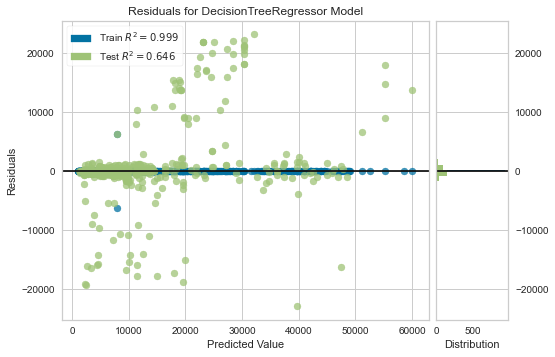

In [36]:
plot_model(dt)

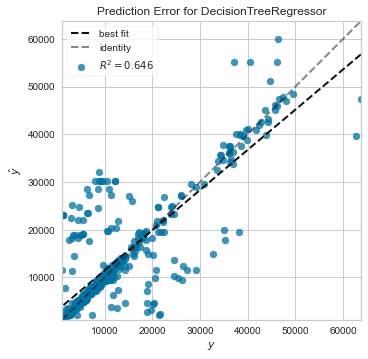

In [39]:
plot_model(dt, plot = 'error')

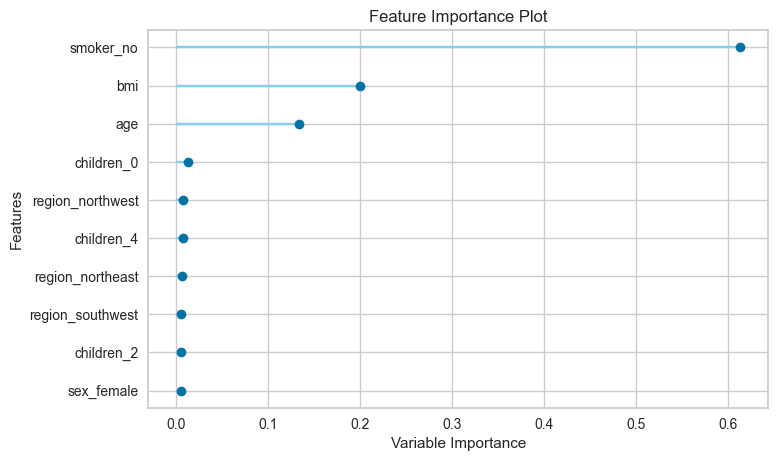

In [38]:
plot_model(dt, plot = 'feature')

In [19]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

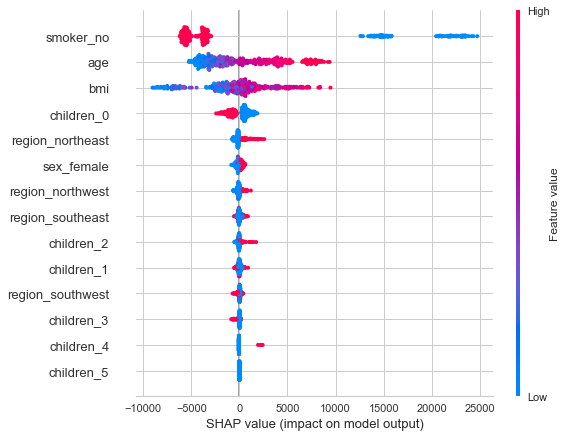

In [40]:
interpret_model(lightgbm)

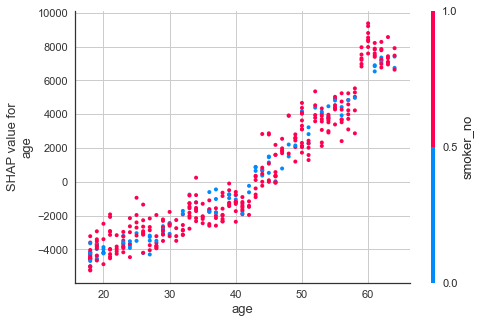

In [41]:
interpret_model(lightgbm, plot = 'correlation')

In [42]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [43]:
best = automl(optimize = 'MAE')
best

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=123,
                                                       splitter='best'),
                

# 12. Predict Model

In [44]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2764.0353,20686826.5633,4548.2773,0.8552,0.5223,0.3678


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9800.888672,9363.966518
1,32.0,37.334999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4667.607422,10393.493570
2,27.0,31.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34838.871094,35628.993319
3,35.0,24.129999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5125.215820,6926.826747
4,60.0,25.740000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12142.578125,17508.278269


In [45]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,16884.923828
1,18,male,33.770,1,no,southeast,1725.552246
2,28,male,33.000,3,no,southeast,3847.674072
3,33,male,22.705,0,no,northwest,21984.470703
4,32,male,28.880,0,no,northwest,3866.855225


# 13. Save / Load Model

In [47]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                         criterion='mse',
                                                                         max_depth=None,
                                              

In [27]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [28]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='charges')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [50]:
from pycaret.regression  import get_config, set_config
#set_config(display='text')

# 14. Deploy Model

In [51]:
#deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

# 15. Get Config / Set Config

In [52]:
X_train = get_config('X_train')
X_train.head()

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.549999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
904,60.0,35.099998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
670,30.0,31.570000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
617,49.0,25.600000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
373,26.0,32.900002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
get_config('seed')

123

In [54]:
from pycaret.regression import set_config
set_config('seed', 999)

In [55]:
get_config('seed')

999